In [2]:
import numpy as np
import pandas as pd
import re
from sklearn.ensemble import RandomForestClassifier, ExtraTreesRegressor
# ---------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', 1000)
sns.set_style('whitegrid')
sns.color_palette('pastel')
%matplotlib inline
# ---------------------------------------------------------------------------
train_data = pd.read_csv("titanic_data.csv", dtype={"Age": np.float64}, )
test_data = pd.read_csv("test.csv", dtype={"Age": np.float64}, )

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


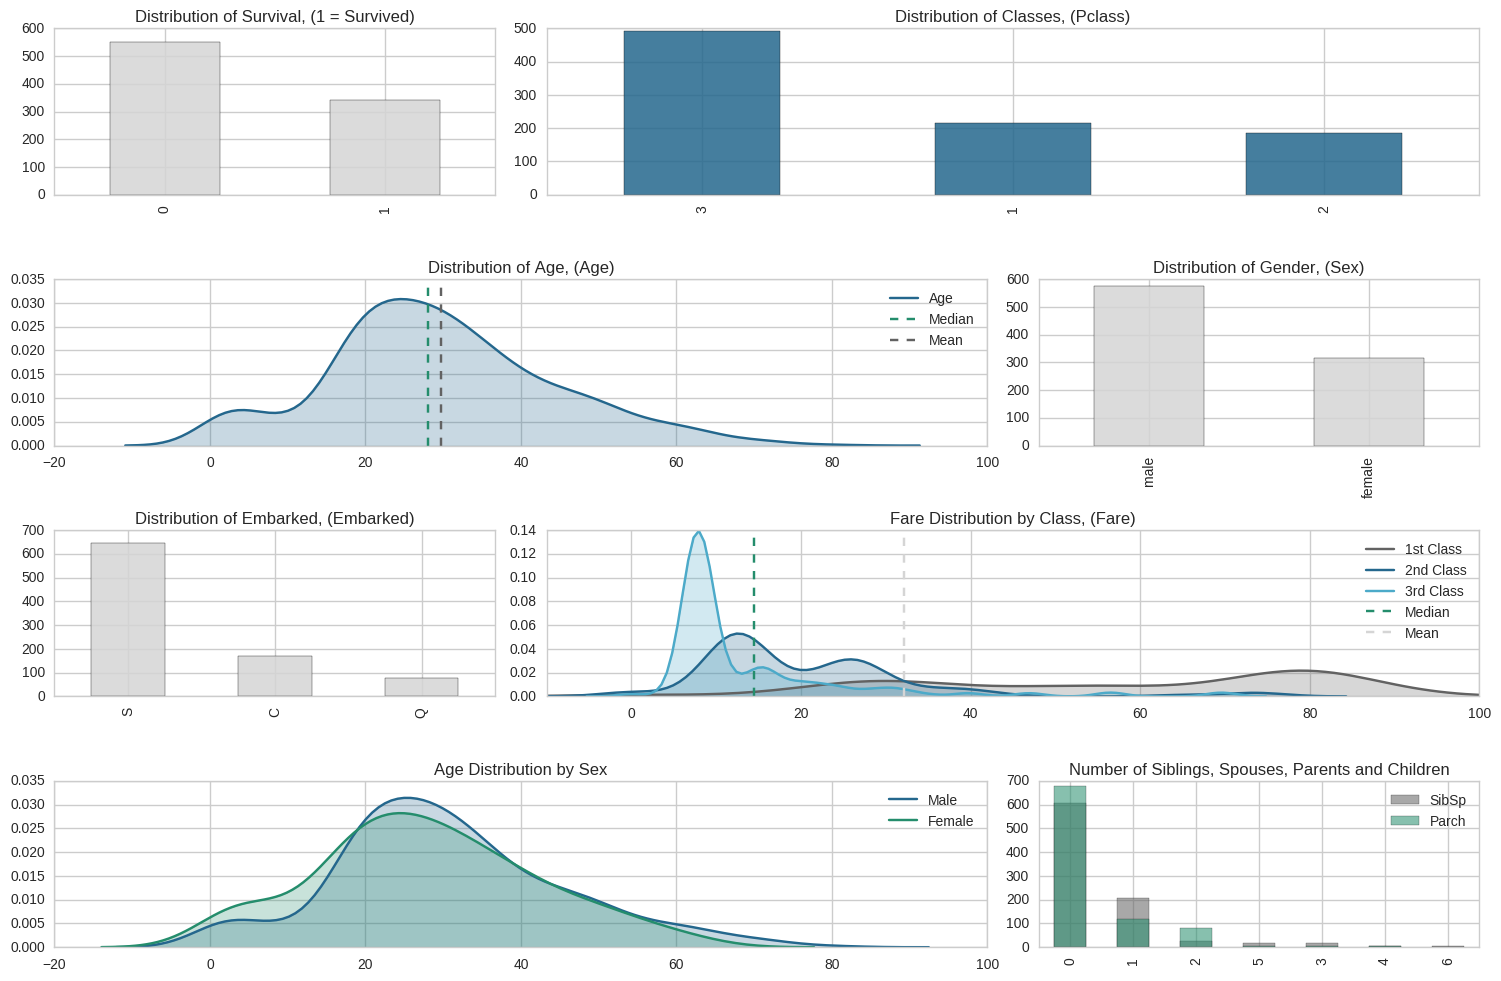

In [13]:
fig = plt.figure(figsize=(15,12), dpi=1600) 
c = ['#24678d','#4caac9','#626262','#d5d5d5','#248d6c']

### ------------------------------------------------------------
ax1 = plt.subplot2grid((5,3),(0,0))
train_data.Survived.value_counts().plot(kind='bar', alpha=0.85,color=c[3])
plt.title("Distribution of Survival, (1 = Survived)")

ax2 = plt.subplot2grid((5,3),(0,1),colspan=2)
train_data.Pclass.value_counts().plot(kind='bar', alpha=0.85,color=c[0])
plt.title("Distribution of Classes, (Pclass)")

### ------------------------------------------------------------
ax3 = plt.subplot2grid((5,3),(1,0),colspan=2)              
sns.kdeplot(train_data.Age, shade=True, color=c[0], label='Age')
plt.axvline(train_data.Age.median(), color=c[4], label='Median', ls='dashed')
plt.axvline(train_data.Age.mean(), color=c[2], label='Mean', ls='dashed')
plt.legend()
plt.title("Distribution of Age, (Age)")

ax4 = plt.subplot2grid((5,3),(1,2),colspan=2)
train_data.Sex.value_counts().plot(kind='bar', alpha=0.85,color=c[3])
plt.title("Distribution of Gender, (Sex)")

### ------------------------------------------------------------
ax5 = plt.subplot2grid((5,3),(2,0))              
train_data.Embarked.value_counts().plot(kind='bar', alpha=0.85,color=c[3])
plt.title("Distribution of Embarked, (Embarked)")

ax6 = plt.subplot2grid((5,3),(2,1),colspan=2)
sns.kdeplot(train_data.Fare[train_data.Pclass==1].apply(lambda x: 80 if x>80 else x), shade=True, color=c[2], label='1st Class')
sns.kdeplot(train_data.Fare[train_data.Pclass==2].apply(lambda x: 80 if x>80 else x), shade=True, color=c[0], label='2nd Class')
sns.kdeplot(train_data.Fare[train_data.Pclass==3].apply(lambda x: 80 if x>80 else x), shade=True, color=c[1], label='3rd Class')
plt.axvline(train_data.Fare.median(), color=c[4], label='Median', ls='dashed')
plt.axvline(train_data.Fare.mean(), color=c[3], label='Mean', ls='dashed')
ax6.set_xlim(-10, 100)
plt.legend()
plt.title("Fare Distribution by Class, (Fare)")

### ------------------------------------------------------------
ax7 = plt.subplot2grid((5,3),(3,0),colspan=2)
sns.kdeplot(train_data.Age[train_data.Sex=='male'], shade=True, color=c[0], label='Male')
sns.kdeplot(train_data.Age[train_data.Sex=='female'], shade=True, color=c[4], label='Female')
plt.legend()
plt.title("Age Distribution by Sex")

ax8 = plt.subplot2grid((5,3),(3,2))
train_data.SibSp.value_counts().plot(kind='bar', alpha=0.55,color=c[2])
train_data.Parch.value_counts().plot(kind='bar', alpha=0.55,color=c[4])
plt.legend()
plt.title("Number of Siblings, Spouses, Parents and Children")

### ------------------------------------------------------------
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

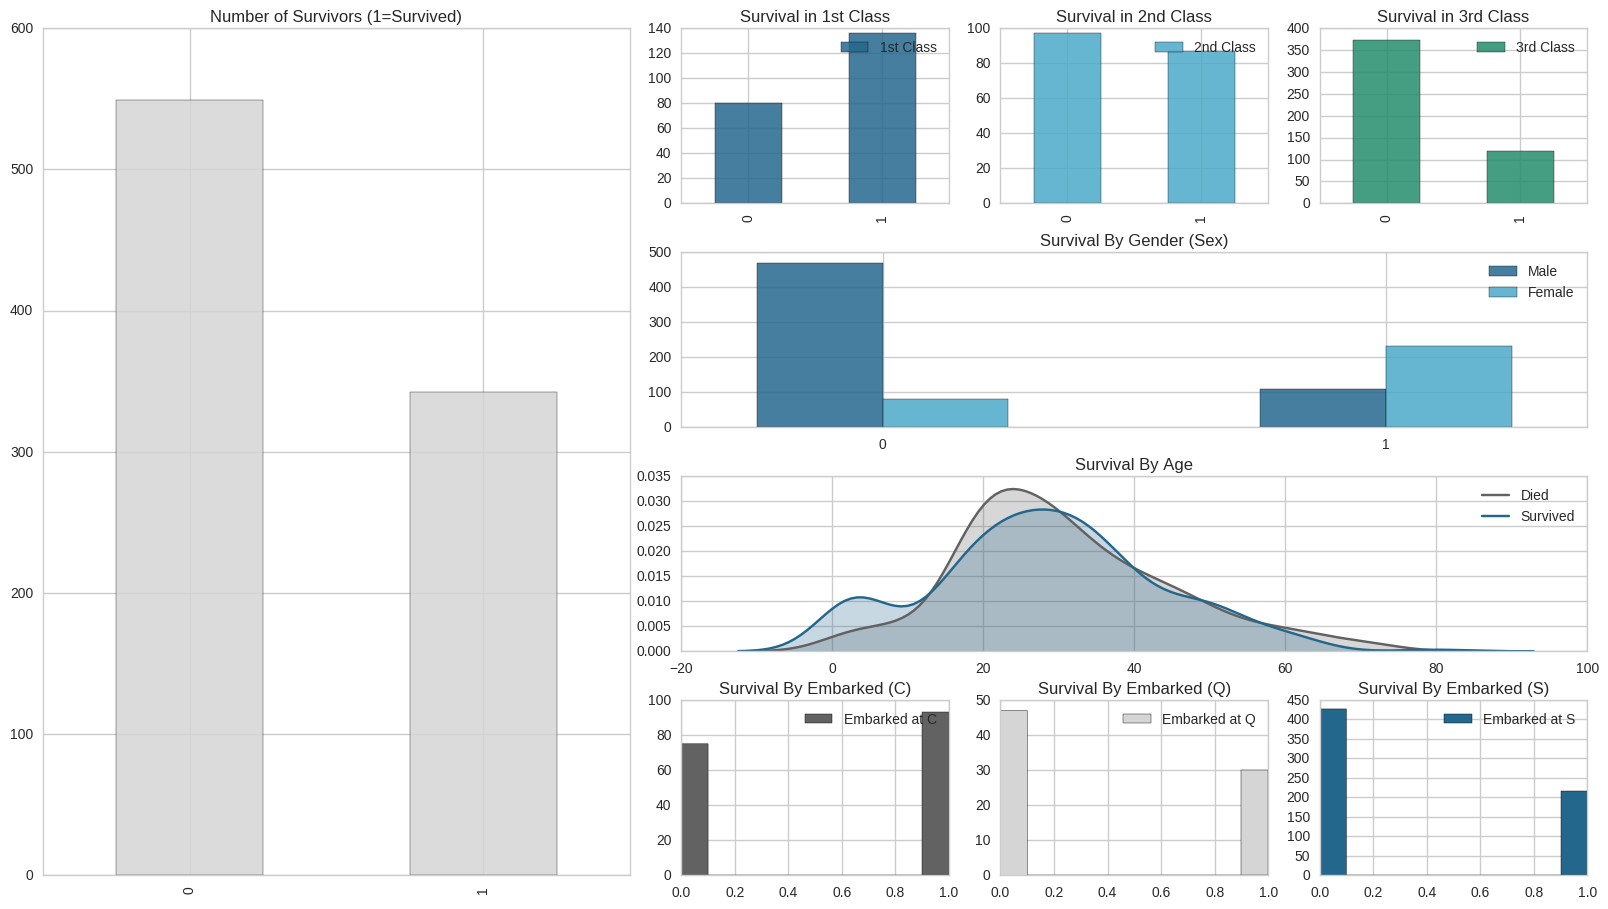

In [14]:
fig = plt.figure(figsize=(16,9), dpi=1600)
c = ['#24678d','#4caac9','#626262','#d5d5d5','#248d6c']

### ------------------------------------------------------------
ax1 = plt.subplot2grid((16,15),(0,0),rowspan=16, colspan=6)
train_data.Survived.value_counts().plot(kind='bar', alpha=0.85,color=c[3],ax=ax1)
plt.title("Number of Survivors (1=Survived)")

# ### ------------------------------------------------------------
ax2 = plt.subplot2grid((16,15),(0,6),rowspan=4,colspan=3)
train_data.Survived[train_data.Pclass==1].value_counts().sort_index().plot(kind='bar', alpha=0.85,color=c[0], label='1st Class')
plt.legend()
plt.title("Survival in 1st Class")

ax3 = plt.subplot2grid((16,15),(0,9),rowspan=4,colspan=3)
train_data.Survived[train_data.Pclass==2].value_counts().sort_index().plot(kind='bar', alpha=0.85,color=c[1], label='2nd Class')
plt.legend()
plt.title("Survival in 2nd Class")

ax4 = plt.subplot2grid((16,15),(0,12),rowspan=4,colspan=3)              
train_data.Survived[train_data.Pclass==3].value_counts().sort_index().plot(kind='bar', alpha=0.85,color=c[4], label='3rd Class')
plt.legend()
plt.title("Survival in 3rd Class")

# ### ------------------------------------------------------------
ax5 = plt.subplot2grid((16,15),(4,6),rowspan=4,colspan=9)
plt.bar(np.array([0,1])-0.25, train_data.Survived[train_data.Sex=='male'].value_counts().sort_index(), width=0.25,color=c[0], label='Male',alpha=0.85)
plt.bar(np.array([0,1]), train_data.Survived[train_data.Sex=='female'].value_counts().sort_index(), width=0.25,color=c[1], label='Female',alpha=0.85)
plt.xticks(np.arange(0, 2, 1))
plt.legend()
plt.title("Survival By Gender (Sex)")

# ### ------------------------------------------------------------
ax6 = plt.subplot2grid((16,15),(8,6),rowspan=4,colspan=9)
sns.kdeplot(train_data.Age[train_data.Survived==0],shade=True, color=c[2], label='Died')
sns.kdeplot(train_data.Age[train_data.Survived==1], shade=True, color = c[0], label='Survived')
plt.legend()
plt.title("Survival By Age")

# ### ------------------------------------------------------------
ax7 = plt.subplot2grid((16,15),(12,6),rowspan=4,colspan=3)
plt.hist(train_data.Survived[pd.Categorical(train_data.Embarked).codes==0], color=c[2], label='Embarked at C')
plt.legend()
plt.title("Survival By Embarked (C)")

ax8 = plt.subplot2grid((16,15),(12,9),rowspan=4,colspan=3)
plt.hist(train_data.Survived[pd.Categorical(train_data.Embarked).codes==1], color=c[3], label='Embarked at Q')
plt.legend()
plt.title("Survival By Embarked (Q)")

ax9 = plt.subplot2grid((16,15),(12,12),rowspan=4,colspan=3)
plt.hist(train_data.Survived[pd.Categorical(train_data.Embarked).codes==2], color=c[0], label='Embarked at S')
plt.legend()
plt.title("Survival By Embarked (S)")

### ------------------------------------------------------------
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=0.50)
plt.show()

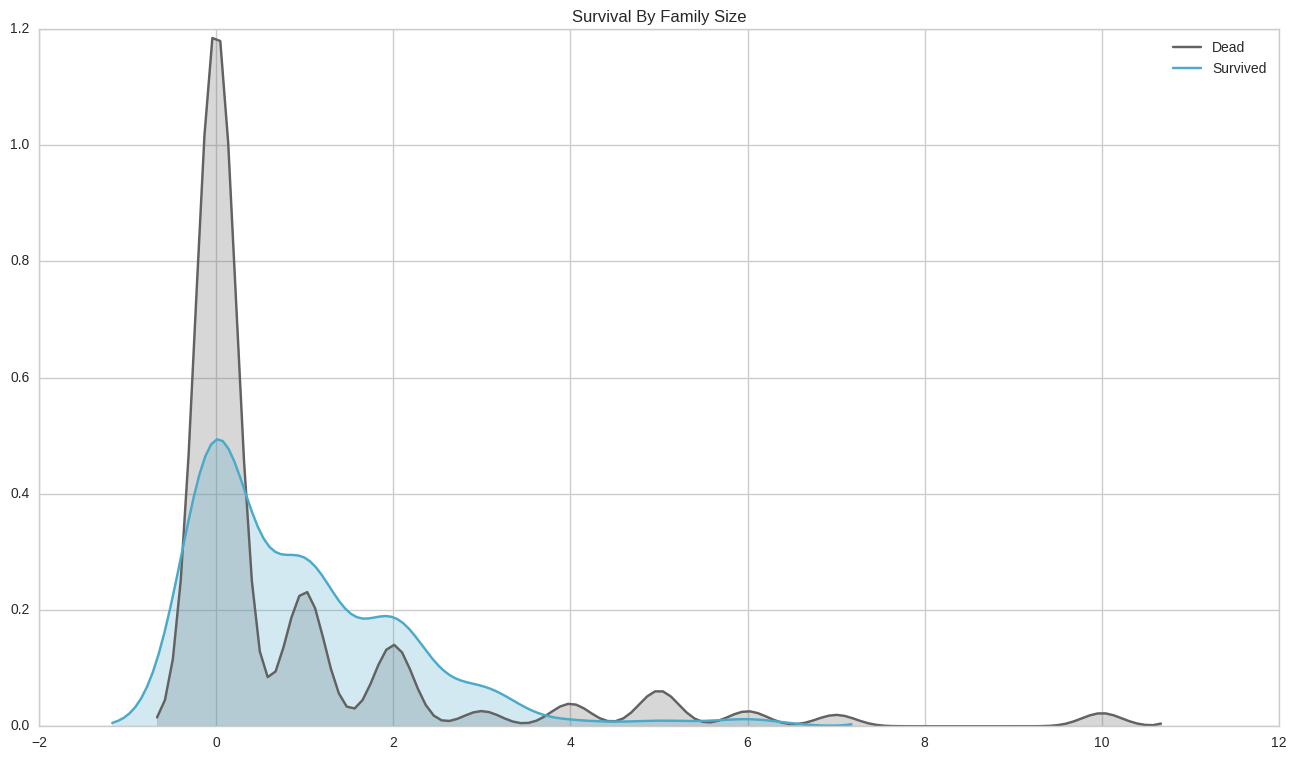

In [16]:
train_data['FamilySize'] = train_data.SibSp + train_data.Parch
fig = plt.figure(figsize=(16,9), dpi=1600)
sns.kdeplot(train_data.FamilySize[train_data.Survived==0],
            shade=True,color=c[2],label='Dead')
sns.kdeplot(train_data.FamilySize[train_data.Survived==1],
            shade=True,color=c[1],label='Survived')
plt.title('Survival By Family Size'); plt.legend(); plt.show()

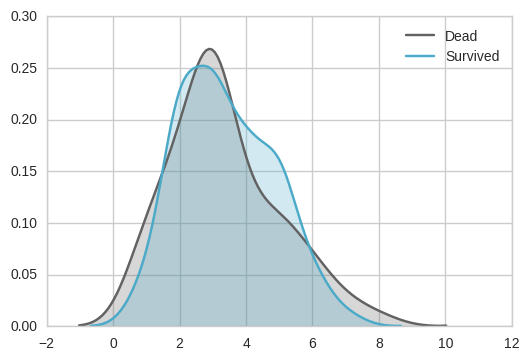

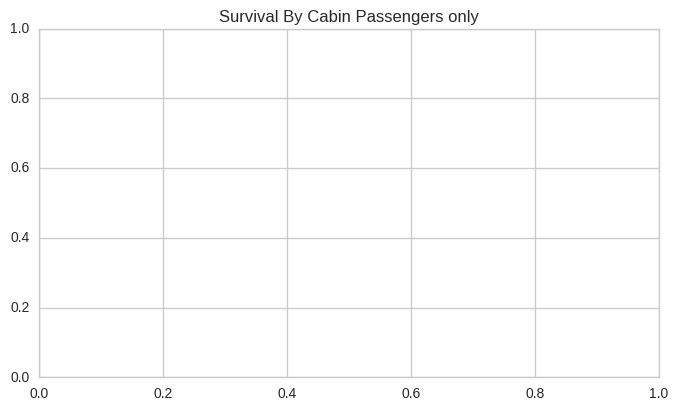

In [19]:
train_data['CabinBlock'] = train_data.Cabin.fillna('0').apply(lambda x: x[0])
train_data['CabinCat'] = pd.Categorical.from_array(train_data.Cabin.fillna('0').apply(lambda x: x[0])).codes
sns.kdeplot(train_data.CabinCat[(train_data.Survived==0)&
            (train_data.CabinCat!=0)],shade=True,color=c[2],label='Dead')
sns.kdeplot(train_data.CabinCat[(train_data.Survived==1)&
            (train_data.CabinCat!=0)],shade=True,color=c[1],label='Survived')
fig = plt.figure(figsize=(8,4.5), dpi=1600)
plt.title('Survival By Cabin Passengers only'); plt.legend();plt.show()

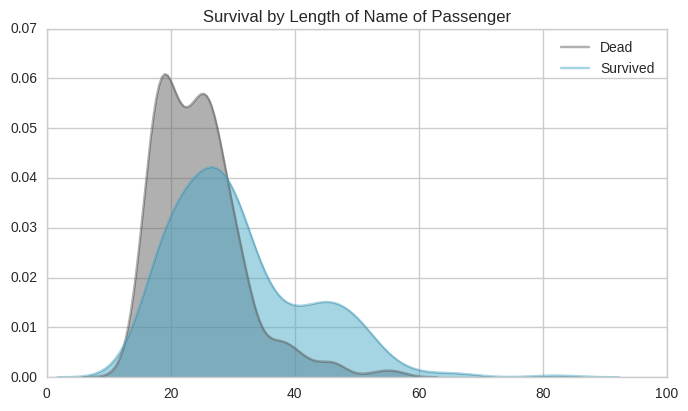

In [20]:
train_data['NameLength'] = train_data.Name.apply(lambda x: len(x))
fig = plt.figure(figsize=(8,4.5), dpi=1600)
sns.kdeplot(train_data.NameLength[(train_data.Survived==0)], 
            shade=True, alpha=0.5,color=c[2],label='Dead')
sns.kdeplot(train_data.NameLength[(train_data.Survived==1)], 
            shade=True, alpha=0.5,color=c[1],label='Survived')
plt.title('Survival by Length of Name of Passenger')
plt.legend(); plt.show()

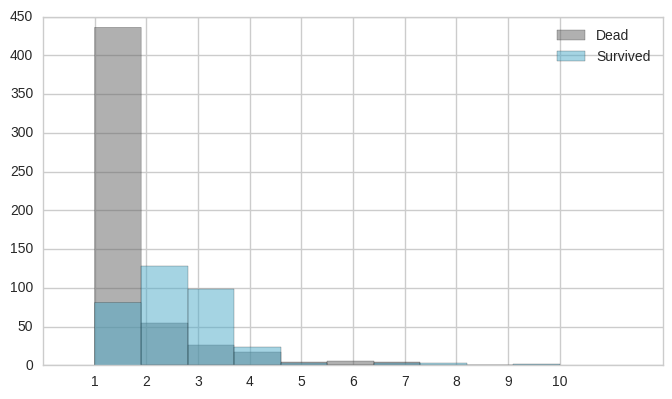

,Age
Title,
Capt,70.000000
Col,58.000000
Countess,33.000000
Don,40.000000
Dr,42.000000
Jonkheer,38.000000
Lady,48.000000
Major,48.500000
Master,4.574167


In [21]:
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1)
    return ""
train_data['Title'] = train_data["Name"].apply(get_title)
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Dr": 5, "Rev": 6, "Major": 7, "Col": 7, "Mlle": 8, "Mme": 8, "Don": 7, "Dona":10, "Lady": 10, "Countess": 10, "Jonkheer": 10, "Sir": 7, "Capt": 7, "Ms": 2}
train_data["TitleCat"] = train_data.loc[:,'Title'].map(title_mapping)
fig = plt.figure(figsize=(8,4.5), dpi=1600)
plt.hist(train_data.TitleCat[(train_data.Survived==0)], alpha=0.5,color=c[2],label='Dead')
plt.hist(train_data.TitleCat[(train_data.Survived==1)], alpha=0.5,color=c[1],label='Survived')
plt.xticks(range(1,11)); plt.legend(); plt.show()
train_data.pivot_table(index=['Title'], values=['Age'])

In [22]:
classers = ['Fare','Parch','Pclass','SibSp','TitleCat','CabinCat','Sex_female','Sex_male', 'EmbarkedCat', 'FamilySize', 'NameLength', 'FamilyId']

age_et = ExtraTreesRegressor(n_estimators=200)

X_train = full_data.loc[full_data.Age.notnull(),classers]
Y_train = full_data.loc[full_data.Age.notnull(),['Age']]
X_test = full_data.loc[full_data.Age.isnull(),classers]

age_et.fit(X_train,np.ravel(Y_train))
age_predictions = age_et.predict(X_test)

train_data.loc[full_data.Age.isnull(),['Age']] = age_predictions

NameError: name 'full_data' is not defined